In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
#leer el archivo
df = pd.read_excel('periodos.xlsx')

In [184]:
df.head()

,año,mes,ciudad,casos,temperatura,contaminacion PM 2.5
0,2020,enero,lima,320,28.4,35
1,2020,febrero,lima,450,29.1,45
2,2020,marzo,lima,289,27.5,30
3,2020,abril,lima,420,26.9,27
4,2020,enero,trujillo,253,25.6,17


In [185]:
#Renombrar combre de las columnas
diccionario = {"año":"anio","contaminacion PM 2.5":"contaminacion_pm_2_5"}
df.rename(columns=diccionario, inplace=True)
df.head(2)

,anio,mes,ciudad,casos,temperatura,contaminacion_pm_2_5
0,2020,enero,lima,320,28.4,35
1,2020,febrero,lima,450,29.1,45


In [186]:
# cantidad de filas y columnas
# (24, 6) -> (cantidad filas, cantidad de columnas)
df.shape

(24, 6)

In [187]:
# Cantidad de datos
df.size

144

In [188]:
# ver la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anio                  24 non-null     int64  
 1   mes                   24 non-null     object 
 2   ciudad                24 non-null     object 
 3   casos                 24 non-null     int64  
 4   temperatura           24 non-null     float64
 5   contaminacion_pm_2_5  24 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ KB


In [189]:
# ver nombre de las columnas
df.columns

Index(['anio', 'mes', 'ciudad', 'casos', 'temperatura',
       'contaminacion_pm_2_5'],
      dtype='object')

In [190]:
# ver tipo de dato de las columnas
df.dtypes

,0
anio,int64
mes,object
ciudad,object
casos,int64
temperatura,float64
contaminacion_pm_2_5,int64


In [191]:
df.head(2)

,anio,mes,ciudad,casos,temperatura,contaminacion_pm_2_5
0,2020,enero,lima,320,28.4,35
1,2020,febrero,lima,450,29.1,45


In [192]:
# uso de iloc: [fila,columna]
df.iloc[2:5,:]

,anio,mes,ciudad,casos,temperatura,contaminacion_pm_2_5
2,2020,marzo,lima,289,27.5,30
3,2020,abril,lima,420,26.9,27
4,2020,enero,trujillo,253,25.6,17


In [193]:
# uso de iloc: [fila,nombre_columna]
df.loc[:3,['anio','contaminacion_pm_2_5']]

,anio,contaminacion_pm_2_5
0,2020,35
1,2020,45
2,2020,30
3,2020,27


In [194]:
df.tail(2)

,anio,mes,ciudad,casos,temperatura,contaminacion_pm_2_5
22,2022,marzo,trujillo,265,28.0,26
23,2022,abril,trujillo,299,27.5,21


In [195]:
nuevo_dato = {"anio":2022,"mes":"abril","ciudad":"lima","casos":278,"temperatura":29.5,"contaminacion_pm_2_5":30}
tamanio = len(df)
df.loc[tamanio] = nuevo_dato

In [196]:
df.tail(2)

,anio,mes,ciudad,casos,temperatura,contaminacion_pm_2_5
23,2022,abril,trujillo,299,27.5,21
24,2022,abril,lima,278,29.5,30


In [197]:
# Agrupar por columna
df["anio"].groupby(df["anio"]).count()

,anio
anio,
2020,8
2021,8
2022,9


## matplotlib

Gràfico de línea

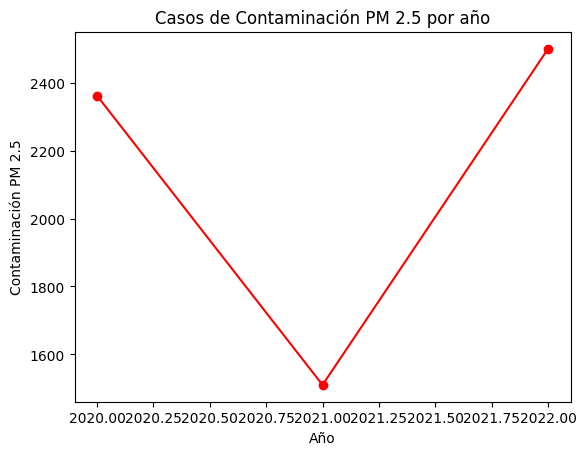

In [198]:
df_grouped = df.groupby("anio").sum().reset_index()

plt.plot(df_grouped["anio"],df_grouped["casos"],marker='o',color='red')

#Agregar tìtulos y etiquetas
plt.title("Casos de Contaminación PM 2.5 por año")
plt.xlabel("Año")
plt.ylabel("Contaminación PM 2.5")

#mostrar la gràfica
plt.show()

Gràfico de barras

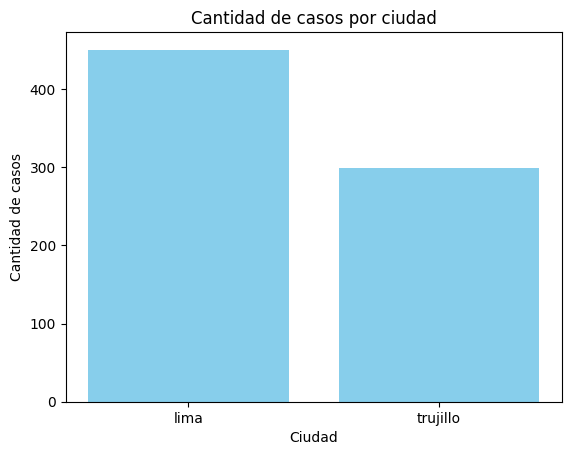

In [220]:
plt.bar(df["ciudad"],df["casos"],color='skyblue')
# plt.barh(df["ciudad"],df["casos"],color='skyblue') -> horizontal

#Agregar tìtulos y etiquetas
plt.title("Cantidad de casos por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de casos")

#mostrar la gràfica
plt.show()

Histograma

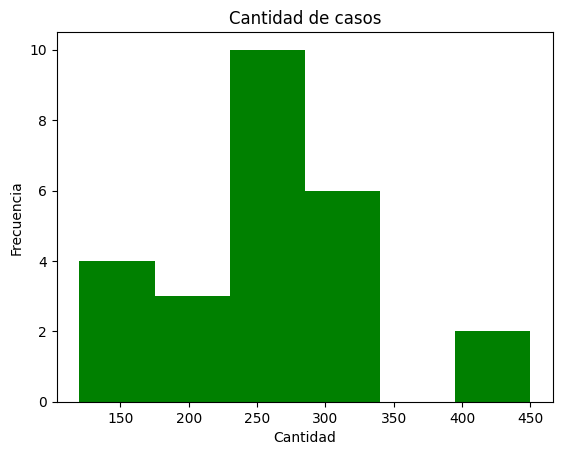

In [229]:
plt.hist(df["casos"],color='green',bins=6)

#Agregar tìtulos y etiquetas
plt.title("Cantidad de casos")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")

#mostrar la gràfica
plt.show()

Gràfica de dispersión

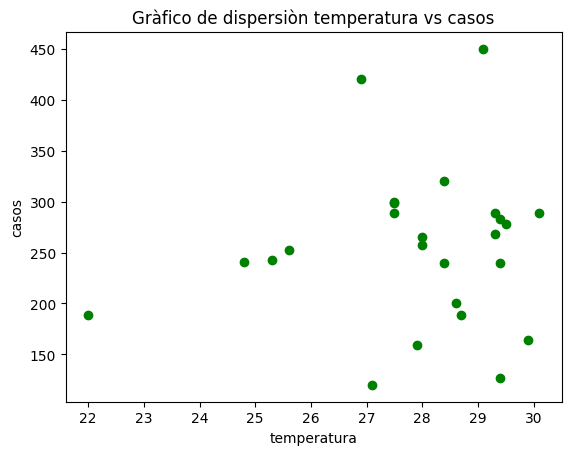

In [232]:
plt.scatter(df["temperatura"],df["casos"],color='green')

#Agregar tìtulos y etiquetas
plt.title("Gràfico de dispersiòn temperatura vs casos")
plt.xlabel("temperatura")
plt.ylabel("casos")

#mostrar la gràfica
plt.show()

Gràfico circular

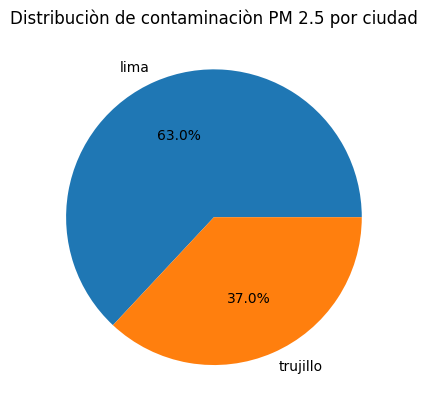

In [239]:
contar_ciudad_contaminacion_pm = df.groupby("ciudad")["contaminacion_pm_2_5"].sum().reset_index()

plt.pie(contar_ciudad_contaminacion_pm["contaminacion_pm_2_5"],labels=contar_ciudad_contaminacion_pm["ciudad"],autopct='%1.1f%%')

#Agregar tìtulos y etiquetas
plt.title("Distribuciòn de contaminaciòn PM 2.5 por ciudad")
#mostrar la gràfica
plt.show()

## Seaborn

Gràfico de barras

/tmp/ipython-input-249-2711638035.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="ciudad",y="casos",data=df,ci = None)


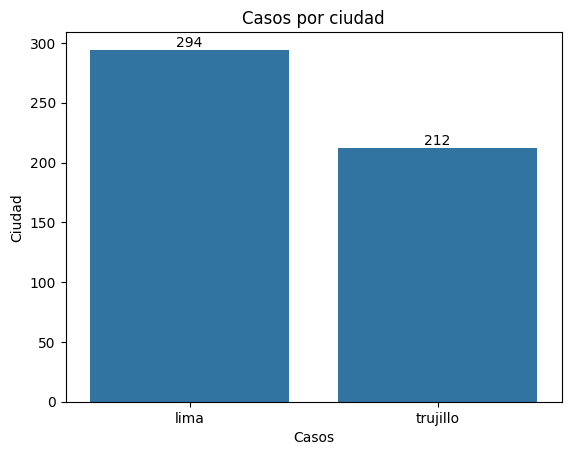

In [249]:
ax = sns.barplot(x="ciudad",y="casos",data=df,ci = None)

# Agragar valores a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

#Agregar tìtulos y etiquetas
plt.title("Casos por ciudad")
plt.xlabel("Casos")
plt.ylabel("Ciudad")

#mostrar la gràfica
plt.show()

Gràfico de barras apiladas

/tmp/ipython-input-254-983663618.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="anio",y="casos",hue="ciudad",data=df,ci = None)


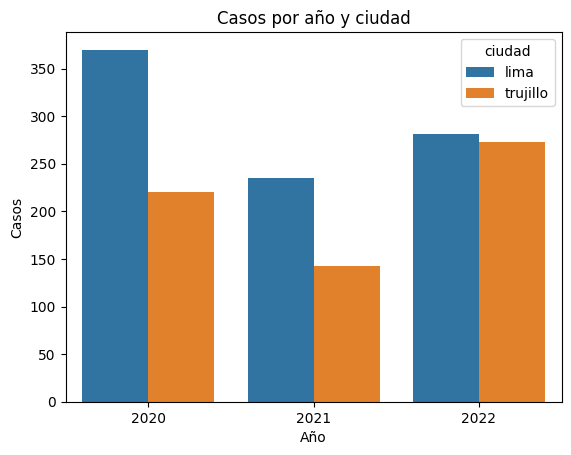

In [254]:
sns.barplot(x="anio",y="casos",hue="ciudad",data=df,ci = None)

#Agregar tìtulos y etiquetas
plt.title("Casos por año y ciudad")
plt.xlabel("Año")
plt.ylabel("Casos")

#mostrar la gràfica
plt.show()

Gràfico de dispersión

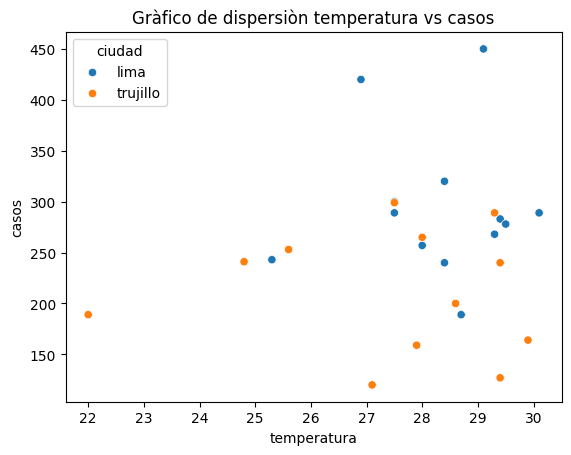

In [256]:
sns.scatterplot(x="temperatura",y="casos",hue="ciudad",data=df)

#Agregar tìtulos y etiquetas
plt.title("Gràfico de dispersiòn temperatura vs casos")
plt.xlabel("temperatura")
plt.ylabel("casos")
plt.show()

Gràfico de líneas

/tmp/ipython-input-260-2772017740.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="anio",y="casos",hue="ciudad",data=df,ci=None,marker='o')


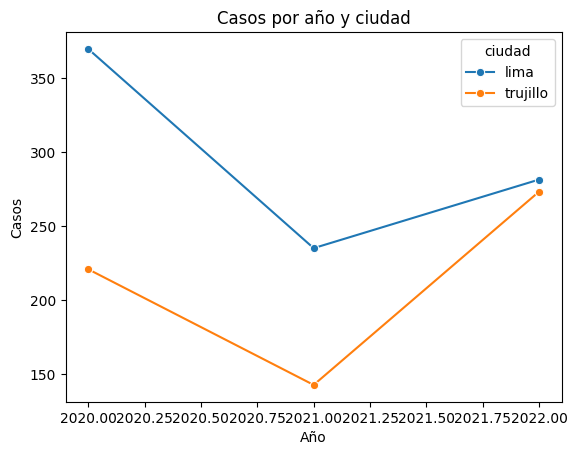

In [260]:
sns.lineplot(x="anio",y="casos",hue="ciudad",data=df,ci=None,marker='o')

#Agregar tìtulos y etiquetas
plt.title("Casos por año y ciudad")
plt.xlabel("Año")
plt.ylabel("Casos")

plt.show()